In [39]:
from openpyxl import load_workbook
import PharmOps.io as pharmio
import pandas as pd
import matplotlib.pyplot as plt
filepathDAR = r'E:\pharmacodynamics\sample data\summary table\DAR Ki values 34485-494.xlsx'
filepath5HT = r'E:\pharmacodynamics\sample data\summary table\5HTR KI table 34485-34494.xlsx'
wbDAR = load_workbook(filepathDAR, data_only=True)
wb5HT = load_workbook(filepath5HT, data_only=True)

C:\Users\bartlelo\AppData\Roaming\Python\Python310\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\bartlelo\AppData\Roaming\Python\Python310\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
summaryDAR = pharmio.load_summary_excel(filepathDAR)
summary5HT = pharmio.load_summary_excel(filepath5HT)

D1
D2 Ki
D3 Ki
D4.4 Ki
Clean sheet
Clean sheet
5HT1A
5HT2A
5HT2B
5HT2C


In [3]:
print(summaryDAR)
print(summary5HT)
combined = {}
for key in summaryDAR:
    if key in summary5HT:
        if isinstance(summaryDAR[key], dict) and isinstance(summary5HT[key], dict):
            combined[key] = {**summaryDAR[key], **summary5HT[key]}
        
print(combined)

{'SCH-23390': {'D1': {'mean': {'ic50': 1.0019666666666667, 'ki': 0.7205645996587119, 'hillSlope': -0.9764333333333335}, 'sem': {'ic50': 0.05876394397171715, 'ki': 0.044974034674686296, 'hillSlope': 0.06478339121856606}}}, 'SKF-38393': {'D1': {'mean': {'ic50': 395.1666666666667, 'ki': 284.00355608999234, 'hillSlope': -0.7035666666666667}, 'sem': {'ic50': 59.085371379988096, 'ki': 42.149586145380624, 'hillSlope': 0.04326254474459147}}}, 34485: {'D1': {'mean': {'ic50': 3393, 'ki': 2438.600707787093, 'hillSlope': -1.1120333333333334}, 'sem': {'ic50': 302.2339050029519, 'ki': 214.62042268143983, 'hillSlope': 0.056855674983046126}}, 'D2 Ki': {'mean': {'ic50': 7.729, 'ki': 1.6574190893100933, 'hillSlope': -1.1253333333333335}, 'sem': {'ic50': 1.1381323883157595, 'ki': 0.250305014083271, 'hillSlope': 0.015645375603601793}}, 'D3 Ki': {'mean': {'ic50': 0.345825, 'ki': 0.16444429594218482, 'hillSlope': -2.471285714285714}, 'sem': {'ic50': 0.14739810251492388, 'ki': 0.03912443016383234, 'hillSlope

Drug: 34485
Drug: 34486
Drug: 34487
Drug: 34488
Drug: 34489
Drug: 34490
Drug: 34491
Drug: 34492
Drug: 34493
Drug: 34494


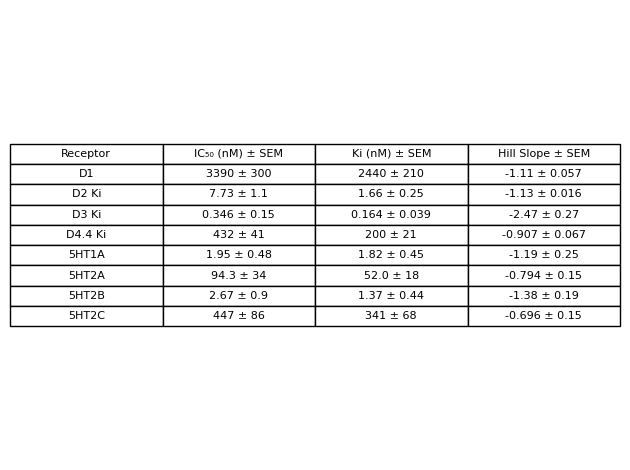

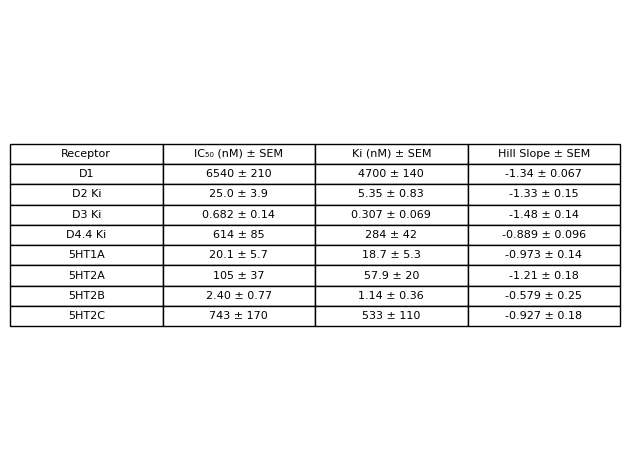

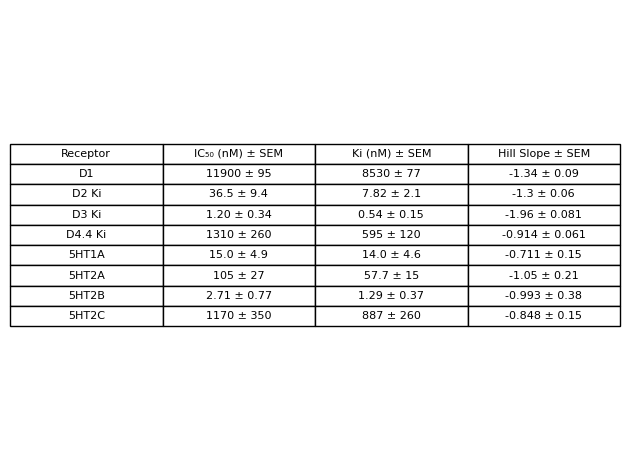

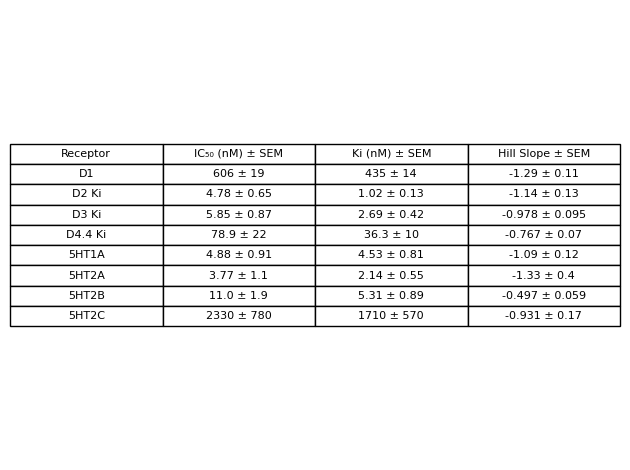

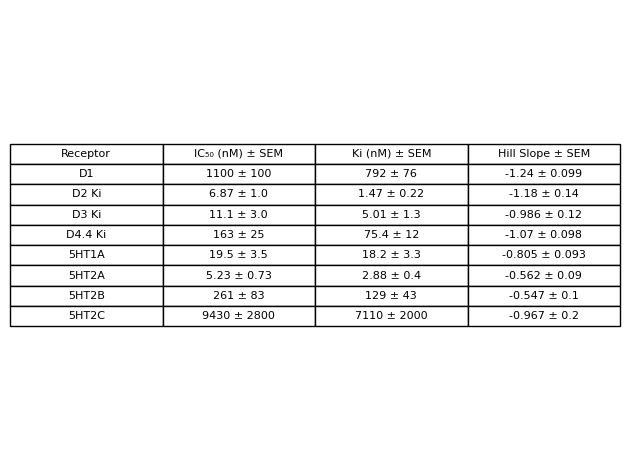

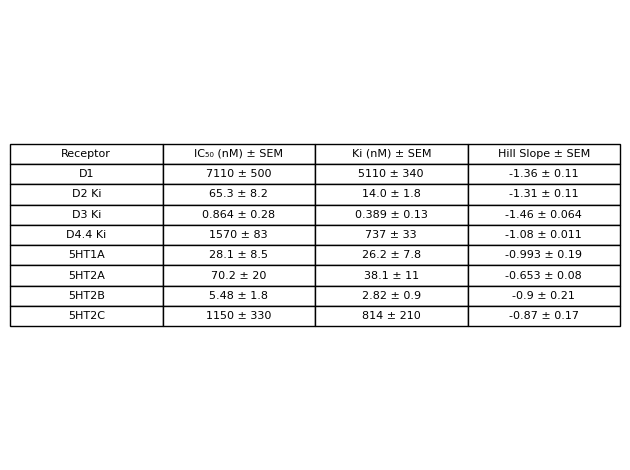

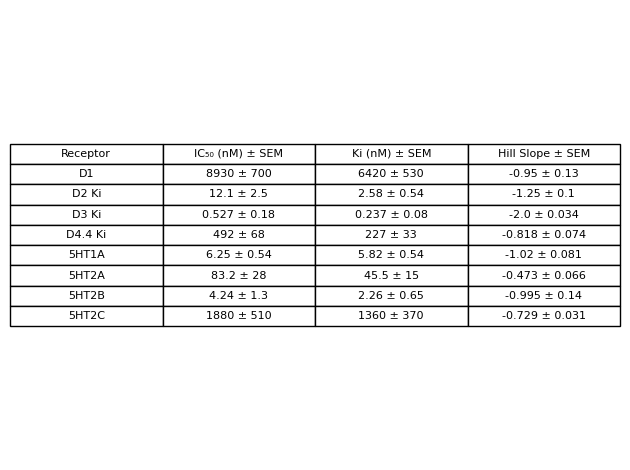

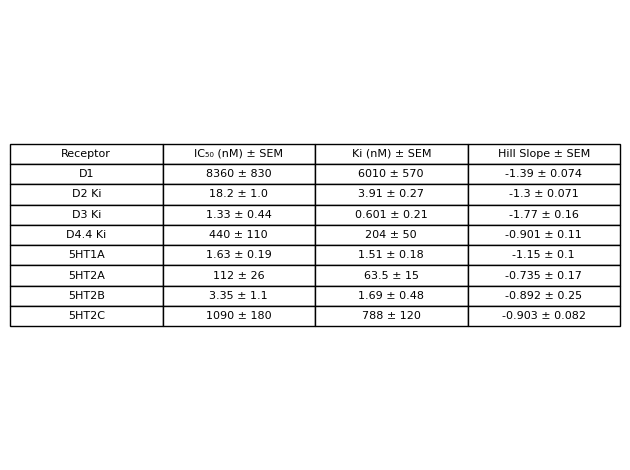

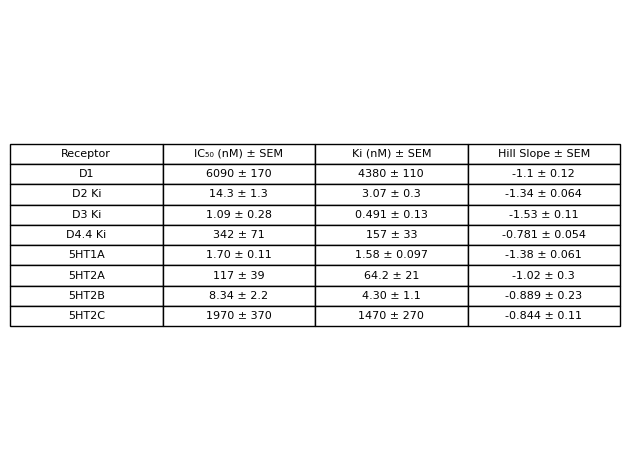

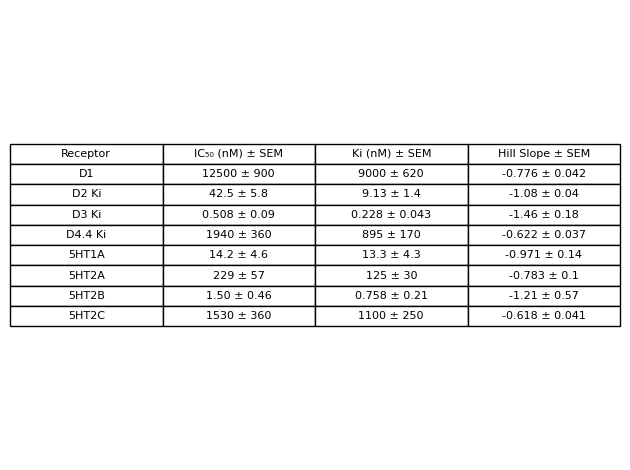

In [44]:
def round_sig(x, sigFigs):
    rounded = '{:g}'.format(float('{:.{p}g}'.format(x, p=sigFigs)))
    if len(rounded) < sigFigs and '.' not in rounded:
        rounded = rounded + '.'
    while len(rounded) <= sigFigs and '.' in rounded:
        rounded = rounded + '0'
    return rounded

meanPrecision = 3
semPrecision = 2
for key, nestedDict in combined.items():
    print(f"Drug: {key}")
    df = pd.DataFrame()
    df['Receptor'] = list(combined[key].keys())
    ic50 = []
    ki = []
    hillSlope = []
    for subKey, values in nestedDict.items():
        if isinstance(values, dict):
            if 'mean' in values and 'sem' in values:
                meanVals = values['mean']
                semVals = values['sem']
                combinedVals = {}
                for meanKey, semKey in zip(meanVals.keys(), semVals.keys()):
                    outputStr = f"{round_sig(meanVals[meanKey], meanPrecision)} ± {round_sig(semVals[semKey], semPrecision)}"
                    match(meanKey):
                        case('ic50'):
                            ic50.append(outputStr)
                        case('ki'):
                            ki.append(outputStr)
                        case('hillSlope'):
                            hillSlope.append(outputStr)
    df['IC₅₀ (nM) ± SEM'] = ic50
    df['Ki (nM) ± SEM'] = ki
    df['Hill Slope ± SEM'] = hillSlope
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=df.values,
            colLabels=df.columns,
            loc='center',
            cellLoc='center')
    plt.tight_layout()
    plt.savefig(f'..\sample data\{key}.png', bbox_inches='tight')